In [1]:
from IPython.display import Image 
from tqdm import tqdm_notebook

## Sect3. Cost 최소화기법, How to minimize cost

## Cost minimize 1 
### 간단한 가설, Linear Model

### Our hypothesis for linear model X * W
hypothesis = X * W


$$H(x) = Wx$$

### cost/loss function
cost = tf.reducemean(tf.square(hypothesis - Y))


$$cost(W) = \frac{1}{m} \sum^m{i=1}(H(x^{(i)}-y^{(i)})^2$$

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

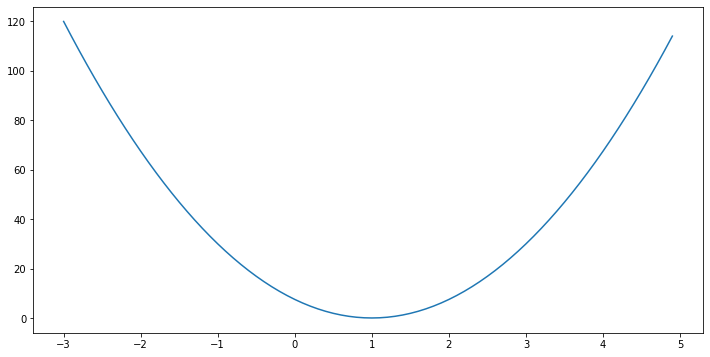

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12,6]

X = [1, 2, 3, 4]
Y = [1, 2, 3, 4]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

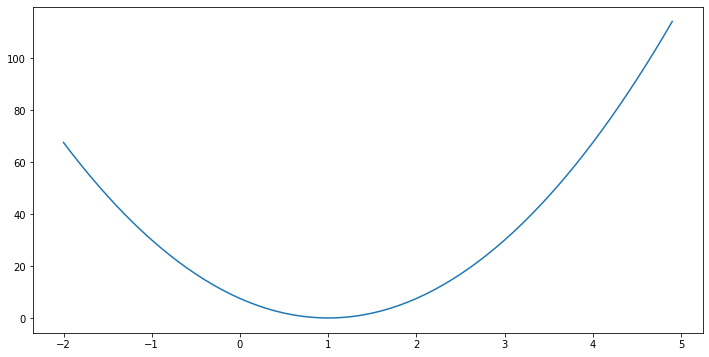

In [6]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

## Cost minimize 2 
## Gradient descent
$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

$$W := W - a\frac{1}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$$

In [7]:
import tensorflow as tf

x_data = [1, 2, 3, 4]
y_data = [1, 2, 3, 4]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step=step, 
            sess_cost=sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W=sess.run(W)
            ));

step=0,   	 sess_cost=0.21420490741729736,    	 W=[0.9155005]
step=1,   	 sess_cost=0.013387765735387802,    	 W=[0.97887516]
step=2,   	 sess_cost=0.0008367353584617376,    	 W=[0.9947188]
step=3,   	 sess_cost=5.229548696661368e-05,    	 W=[0.9986797]
step=4,   	 sess_cost=3.269028638896998e-06,    	 W=[0.9996699]
step=5,   	 sess_cost=2.0415200197021477e-07,    	 W=[0.9999175]
step=6,   	 sess_cost=1.2774265201187518e-08,    	 W=[0.9999794]
step=7,   	 sess_cost=7.846239213904482e-10,    	 W=[0.9999949]
step=8,   	 sess_cost=5.0661697059695143e-11,    	 W=[0.9999987]
step=9,   	 sess_cost=3.595346242946107e-12,    	 W=[0.99999964]
step=10,   	 sess_cost=5.258016244624741e-13,    	 W=[0.9999999]
step=11,   	 sess_cost=0.0,    	 W=[1.]
step=12,   	 sess_cost=0.0,    	 W=[1.]
step=13,   	 sess_cost=0.0,    	 W=[1.]
step=14,   	 sess_cost=0.0,    	 W=[1.]
step=15,   	 sess_cost=0.0,    	 W=[1.]
step=16,   	 sess_cost=0.0,    	 W=[1.]
step=17,   	 sess_cost=0.0,    	 W=[1.]
step=18,   	 

## Cost minimize 3 

In [8]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3, 4]
Y = [1, 2, 3, 4]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

In [9]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in range(101):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            )); 
                
    sess.run(train)

step=0, 	 W=5.0
step=1, 	 W=-1.0
step=2, 	 W=2.0
step=3, 	 W=0.5
step=4, 	 W=1.25
step=5, 	 W=0.875
step=6, 	 W=1.0625
step=7, 	 W=0.96875
step=8, 	 W=1.015625
step=9, 	 W=0.9921875
step=10, 	 W=1.00390625
step=20, 	 W=1.0000038146972656
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0


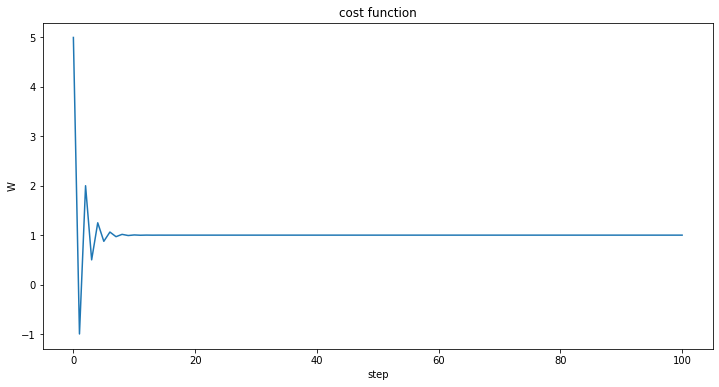

In [10]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()

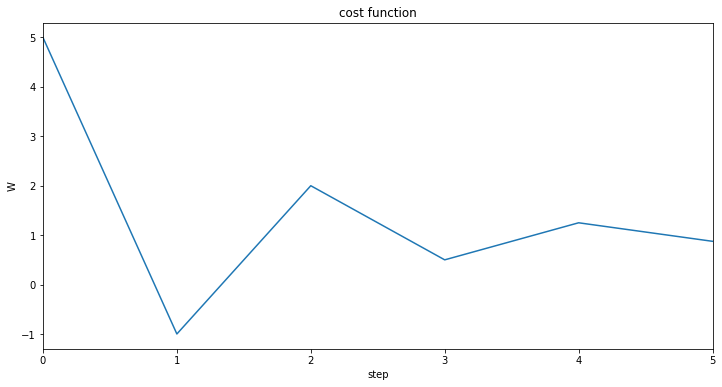

In [11]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.xlim(0, 5)
plt.show()

In [12]:
type(train)

tensorflow.python.framework.ops.Operation

In [13]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [3, 6, 9]

# Set wrong model weights
W = tf.Variable(-7.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# tensorboard for graph
writer = tf.summary.FileWriter("./graph/sect03", sess.graph)

In [14]:
sess.graph

In [15]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            ));    
    sess.run(train)

step=0, 	 W=-7.0
step=1, 	 W=2.333333969116211
step=2, 	 W=2.9555556774139404
step=3, 	 W=2.997037172317505
step=4, 	 W=2.999802350997925
step=5, 	 W=2.9999868869781494
step=6, 	 W=2.9999990463256836
step=7, 	 W=3.0
step=8, 	 W=3.0
step=9, 	 W=3.0
step=10, 	 W=3.0
step=20, 	 W=3.0
step=30, 	 W=3.0
step=40, 	 W=3.0
step=50, 	 W=3.0
step=60, 	 W=3.0
step=70, 	 W=3.0
step=80, 	 W=3.0
step=90, 	 W=3.0
step=100, 	 W=3.0


In [16]:
W_val = sess.run(W)
W_val

3.0